<a href="https://colab.research.google.com/github/kenca5ey/et5003/blob/main/ET5003_KaggleCompetition_KennethCasey_20197764.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


### Enter your details here:
**Team Number:** 5
 - **Student_ID & Name:** 20197764 Kenneth Casey
 - **Student_ID & Name:** 20157347 Robert Barrett
 - **Student_ID & Name:** 9312951 Michael Scally
 - **Student_ID & Name:** 12129798 Anthony Purcell
 - **Student_ID & Name:** 20201214 Raymond Beechinor

In [2]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [3]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
!pip install kneed

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Imports to aid with determining number of clusters to choose
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [9]:
!pip install gpy

In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Specifying the Google Drive path which contains the dataset
Path = '/content/drive/MyDrive/Colab Notebooks/Enrique/Data/kaggle_dataset/'

# training dataset: 
training_file = Path + "HousePrice_Train.csv"
# test dataset: 
testing_file = Path + "HousePrice_Test.csv"

In [14]:
df_train = pd.read_csv(training_file)
df_test = pd.read_csv(testing_file)

### Train dataset

In [15]:
print(f"The training data has {df_train.shape[1]} columns")
print(f"The training data has {df_train.shape[0]} rows")

The training data has 14 columns
The training data has 1638 rows


In [16]:
# show first data frame rows 
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [17]:
# Generate descriptive statistics
df_train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [18]:
df_train.isnull().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [19]:
# Determine the rows with a Num_Beds outlier of 0 or greater than 10
beds_and_baths_outlier_filter = (df_train['Num_Beds'] == 0) | (df_train['Num_Beds'] > 7) | (df_train['Num_Bathrooms'] == 0) | (df_train['Num_Bathrooms'] > 7)

# Printing the number of outliers for surface
print(f"Removing {df_train[beds_and_baths_outlier_filter]['ID'].count()} outliers for beds and bathrooms")

df_train.drop((df_train.loc[beds_and_baths_outlier_filter]).index, inplace=True)

Removing 9 outliers for beds and bathrooms


In [20]:
longitude_outliers = (df_train['Longitude']>-6) | (df_train['Longitude']<-7)

# Extract the rows with a latitude outside of dublin
latitude_outliers = (df_train['Latitude']>54) | (df_train['Latitude']<53)

# Select all cases where the location falls outside Dublin
df_train[longitude_outliers | latitude_outliers]

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
355,356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.0,199000


In [21]:
df_train.drop((df_train.loc[longitude_outliers & latitude_outliers]).index, inplace=True)

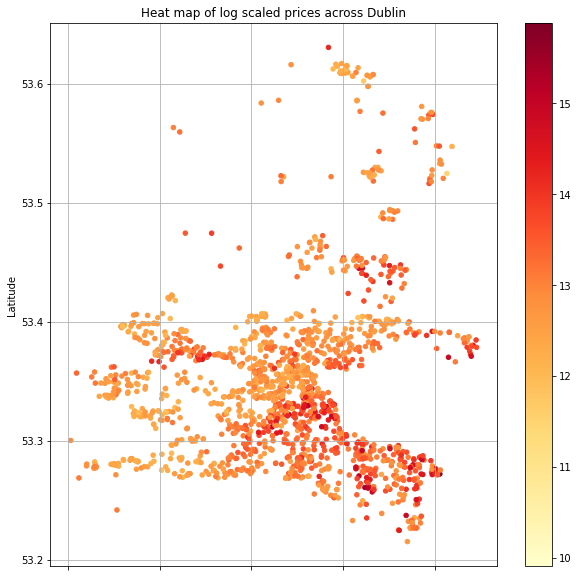

In [22]:
# Log transforming the price to remove heat map sensitivity to outliers
df_train.plot.scatter(x = 'Longitude', y = 'Latitude', c = np.log(df_train['Price']), cmap = 'YlOrRd', figsize = (10,10))
plt.title("Heat map of log scaled prices across Dublin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

In [23]:
df_train['has_parking'] = np.where(df_train['Services'].str.contains("Parking", na=False), 1, 0)

In [24]:
# Building the mapping of value to number
ber_class_mapper = {}
ber_unique_values = df_train['BER_class'].unique().astype(str)
ber_unique_values = np.delete(ber_unique_values, np.where((ber_unique_values == 'nan') | (ber_unique_values == 'SINo666of2006exempt')))
ber_unique_values.sort()
for id, val in enumerate(ber_unique_values):
    ber_class_mapper[val] = id 

mean_ber_value = df_train[df_train['BER_class'] != 'SINo666of2006exempt']['BER_class'].replace(ber_class_mapper).mean()
ber_class_mapper['SINo666of2006exempt'] = mean_ber_value
ber_class_mapper[np.nan] = mean_ber_value

# Printing the created numerical mapping
print("The BER_class values are mapped numerically as follows:")
for ber_class, mapped_val in ber_class_mapper.items():
    print(f"{ber_class} => {mapped_val}")

# Updating the dataframe with the numerical mapping
df_train['BER_class'].replace(ber_class_mapper, inplace=True)

The BER_class values are mapped numerically as follows:
A1 => 0
A2 => 1
A3 => 2
B1 => 3
B2 => 4
B3 => 5
C1 => 6
C2 => 7
C3 => 8
D1 => 9
D2 => 10
E1 => 11
E2 => 12
F => 13
G => 14
SINo666of2006exempt => 8.83406432748538
nan => 8.83406432748538


In [25]:
# Determine the rows with a surface outlier lower than 25 and above 5000
surface_outlier_filter = (df_train['Surface'] < 25) | (df_train['Surface'] > 1000)

# Printing the number of outliers for surface
df_train[surface_outlier_filter]

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price,has_parking
212,213,12405492,Drumcondra,1,1,8.834064,Ecopods brought to you by CDC Estate Agents ha...,NaN,Fully galvanised structure and roof for long l...,53.369627,-6.247286,apartment,18.60000,19995,0
420,421,12080027,Dublin 1,1,1,14.000000,Central in the city!\n\r\nIt doesn't get much ...,NaN,Service charges €2000 p.a approximately \nIncl...,53.349797,-6.255832,studio,22.45000,225000,0
506,507,11675753,Swords,1,4,11.000000,Thornton Park is a superb modern equestrian ce...,NaN,None,53.474502,-6.343483,bungalow,72236.38714,1100000,0
773,774,12051220,Dun Laoghaire,1,3,13.000000,Fabulous opportunity to acquire an extended en...,"Parking,Alarm,Wired for Cable Television,Oil F...",None,53.283656,-6.152538,end-of-terrace,1195.00000,465000,1
1115,1116,11965032,Blanchardstown,1,2,12.000000,Baxter Real Estate are delighted to present to...,NaN,Short drive to the N3 and M50 .\nSuitable for ...,53.386540,-6.377356,bungalow,6705.00000,425000,0
1186,1187,12384756,Dublin 7,1,1,8.834064,Gillespie Lowe are delighted to present this o...,NaN,"Central location,\nFirst floor,\nLifts,\nWell ...",53.356068,-6.265947,apartment,3.40000,200000,0


In [26]:
# Removing these unhelpful outliers:
df_train.drop((df_train.loc[surface_outlier_filter]).index, inplace=True)

In [27]:
# One hot encoding the property_type column
df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=False)

In [28]:
# Declaring utility function to assist with displaying the distributions of the variables
def plot_distributions(fig, column, x, y, z, df, bins=20):
    # Box Plot
    ax1 = fig.add_subplot(x, y, z)
    ax1.set_title(f"Boxplot of the {column} attribute")
    ax1.set_ylabel(column)
    df.boxplot(column=[column])
    
    # Histogram
    ax2 = fig.add_subplot(x, y, z+1)
    ax2.set_title(f"Histogram of the {column} attribute")
    ax2.set_xlabel(column)
    ax2.set_ylabel(f'Number of {column}')
    df[column].hist(bins=20) 

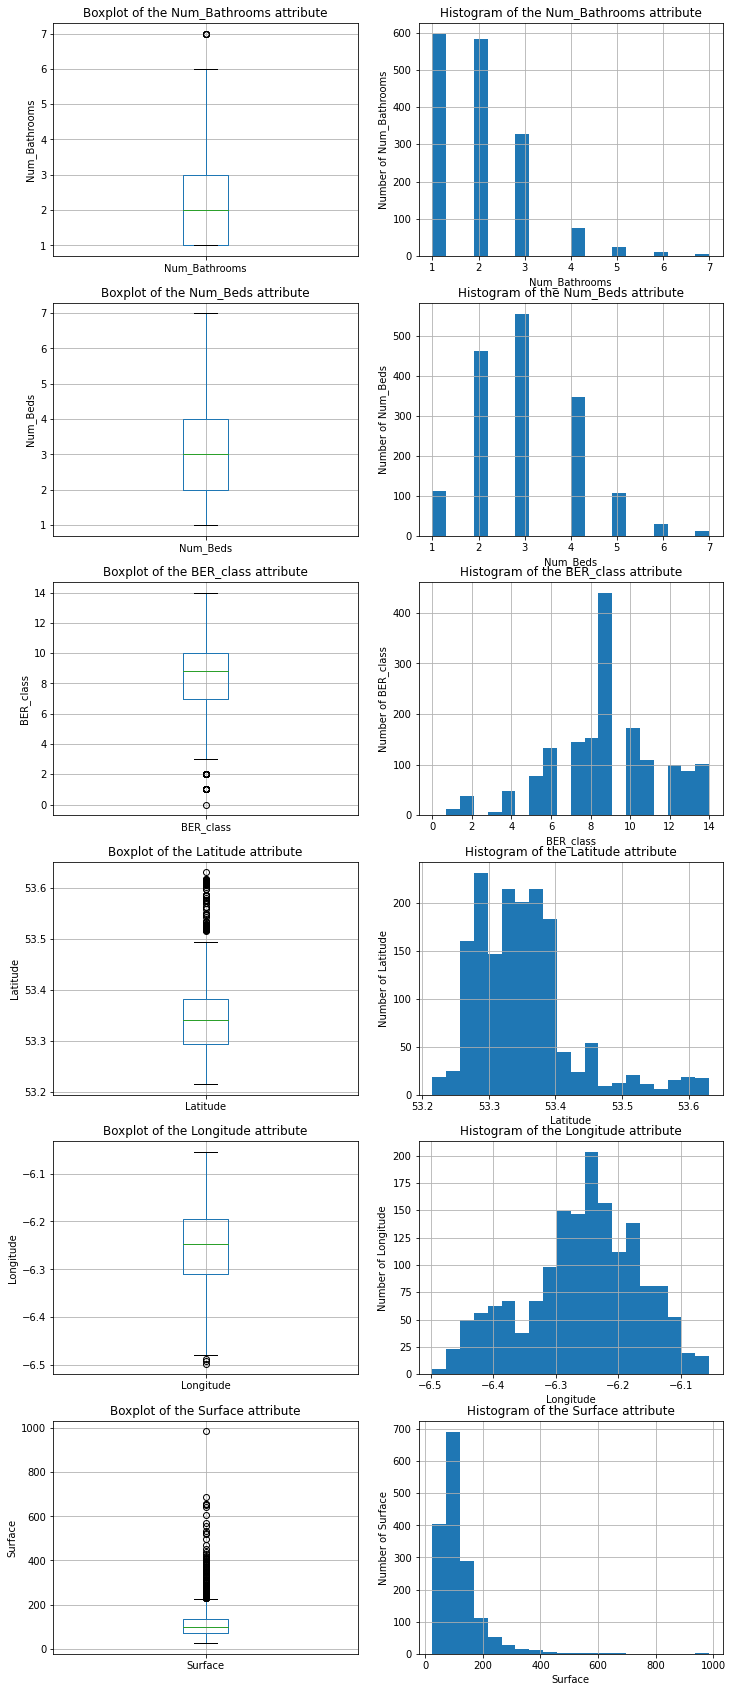

In [29]:
fig = plt.figure(figsize=(12, 30))
plot_distributions(fig, "Num_Bathrooms", 6, 2, 1, df_train)
plot_distributions(fig, "Num_Beds", 6, 2, 3, df_train)
plot_distributions(fig, "BER_class", 6, 2, 5, df_train)
plot_distributions(fig, "Latitude", 6, 2, 7, df_train)
plot_distributions(fig, "Longitude", 6, 2, 9, df_train)
plot_distributions(fig, "Surface", 6, 2, 11, df_train)

In [30]:
df_train['Num_Bathrooms'] = np.log(df_train['Num_Bathrooms'].astype('float'))
df_train['Num_Beds'] = np.log(df_train['Num_Beds'].astype('float'))
df_train['Surface'] = np.log(df_train['Surface'].astype('float'))

In [31]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so each column/feature/variable will have μ = 0 and σ = 1
standard_scaler_X = StandardScaler().fit(df_train[['Latitude', 'Longitude', 'BER_class']])
df_train[['Latitude', 'Longitude', 'BER_class']] = standard_scaler_X.transform(df_train[['Latitude', 'Longitude', 'BER_class']])

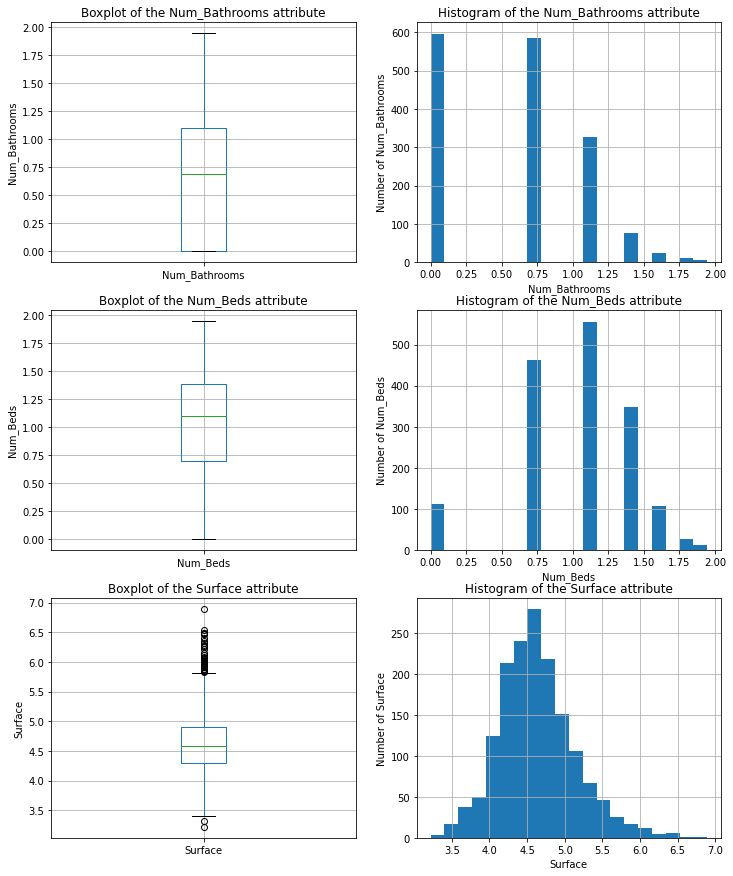

In [32]:
fig = plt.figure(figsize=(12, 15))
plot_distributions(fig, "Num_Bathrooms", 3, 2, 1, df_train)
plot_distributions(fig, "Num_Beds", 3, 2, 3, df_train)
plot_distributions(fig, "Surface", 3, 2, 5, df_train)

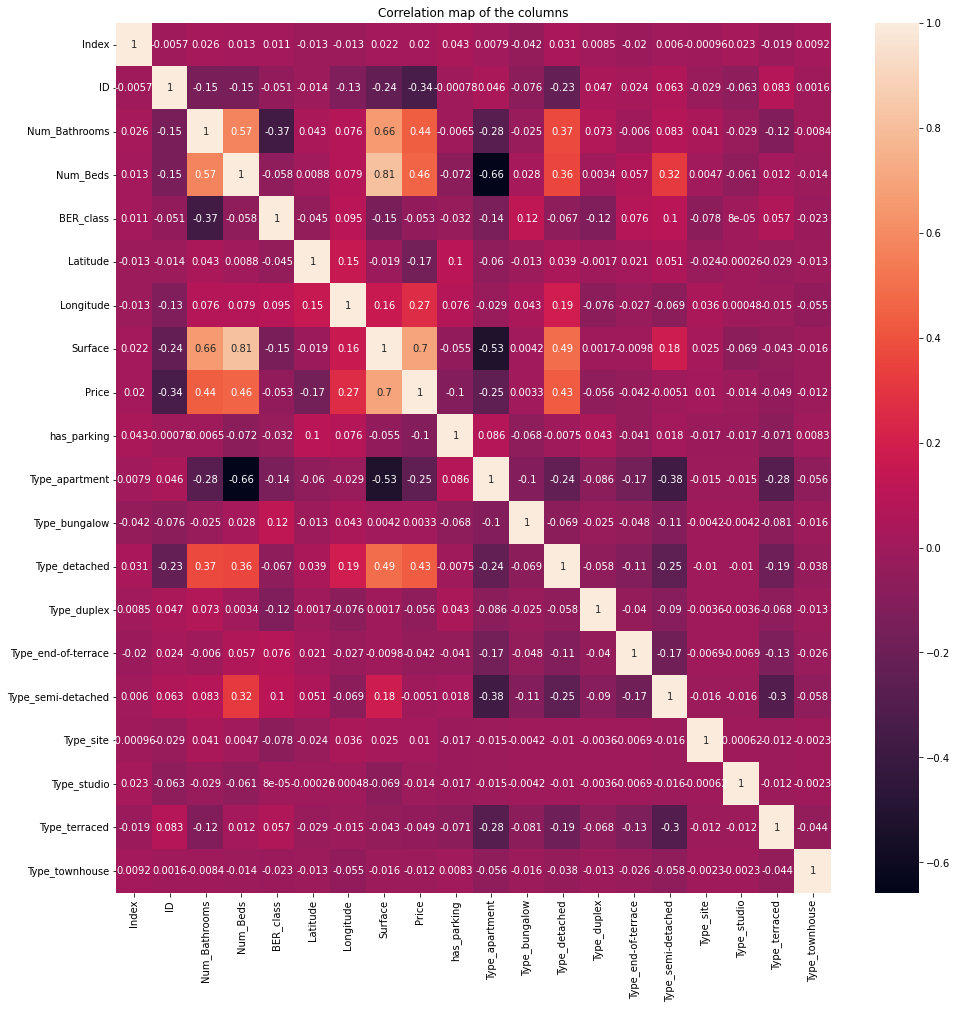

In [33]:
plt.figure(figsize=(16, 16))
plt.title("Correlation map of the columns")
sns.heatmap(df_train.corr(), annot=True);

In [34]:
# Selecting the features upon which to train the models

# Training data
featrain = ['Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Type_apartment', 'has_parking', 'Price']

# # Test data
# featest = ['Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Type_apartment', 'has_parking']
# df_subset_test  =  df_test[featest]

In [35]:
df_train[featrain].describe()

,Longitude,Latitude,Surface,Num_Beds,Num_Bathrooms,Type_detached,Type_apartment,has_parking,Price
count,1.622000e+03,1.622000e+03,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1.622000e+03
mean,-6.746487e-15,3.127899e-14,4.626835,1.020329,0.576978,0.140567,0.264488,0.315660,5.421589e+05
std,1.000308e+00,1.000308e+00,0.506957,0.414033,0.493742,0.347682,0.441196,0.464921,5.064252e+05
min,-2.603060e+00,-1.833120e+00,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,-5.626189e-01,-7.641426e-01,4.290459,0.693147,0.000000,0.000000,0.000000,0.000000,2.950000e+05
50%,1.097326e-01,-1.288449e-01,4.574711,1.098612,0.693147,0.000000,0.000000,0.000000,3.950000e+05
75%,6.924418e-01,4.228444e-01,4.904719,1.386294,1.098612,0.000000,1.000000,1.000000,5.950000e+05
max,2.212899e+00,3.773734e+00,6.892642,1.945910,1.945910,1.000000,1.000000,1.000000,7.950000e+06


In [36]:
# Training set, taking the input columns added and excluding the true price values
Xn = df_train[featrain].iloc[:,0:-1].values
# Training set true prices, taking the output price column from the end
# y = df_train[featrain].iloc[:,-1].values.reshape(-1,1) 
y = df_train[featrain].iloc[:,-1].values


In [37]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), val: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
Xn_train, Xn_val, y_train, y_val = train_test_split(Xn, y, test_size=0.2)

y_train = y_train.reshape(-1,1)

In [38]:
# Applying the log transform to the price
log_of_price_train = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(log_of_price_train)
yn_train = yscaler.transform(log_of_price_train)

### Test dataset

In [39]:
# show first data frame rows 
# dftest.head()

In [40]:
# Generate descriptive statistics
# dftest.describe()

### Expected Cost dataset

In [41]:
# Generate descriptive statistics
# dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [42]:
# your code here

# Full Model

In [43]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,141.5


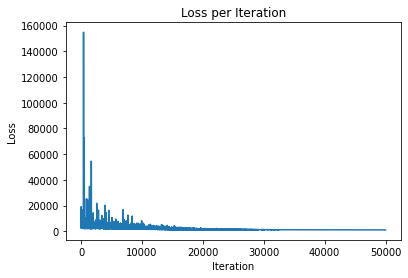

In [44]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [45]:
# samples from the posterior
posterior = approximation.sample(5000)

In [46]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_val) / y_val)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_val, y_pred_BLR))
print("RMSE = ", rms)

MAE =  145814.66004121248
MAPE =  0.22270226427260084
RMSE =  316742.4640575611


# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

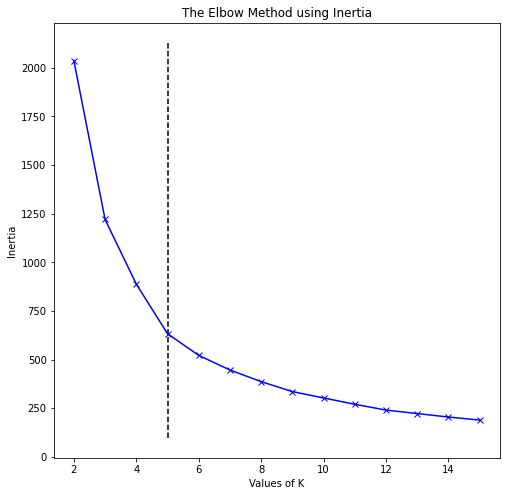

In [47]:
# clustering by the features latitude an longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])

silhouette_coefficients = []
inertias = []
K = range(2, 16)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_ind)
    inertias.append(kmeanModel.inertia_)
    silhouette_coefficients.append(silhouette_score(X_ind, kmeanModel.labels_))
 
# Locate the knee
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 8))
plt.plot(K, inertias, 'bx-')
y_lim = plt.ylim()
plt.vlines(kn.knee, y_lim[0], y_lim[1], linestyles='dashed', colors='k')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

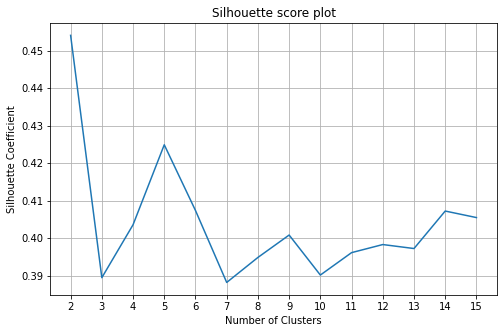

In [48]:
plt.figure(figsize=(8,5))
plt.title("Silhouette score plot")
plt.plot(range(2,16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

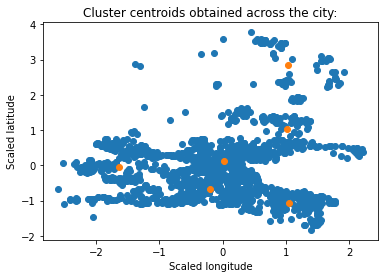

In [49]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)

# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
plt.title("Cluster centroids obtained across the city:")
plt.xlabel("Scaled longitude")
plt.ylabel("Scaled latitude")
plt.show()

In [50]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
print(f"Makeup of training data clusters: {dict(zip(unique_train, counts_train))}")

Makeup of training data clusters: {0: 275, 1: 428, 2: 79, 3: 214, 4: 173, 5: 128}


In [51]:
# validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)

print(f"Makeup of training data clusters: {dict(zip(unique_test, counts_test))}")

Makeup of training data clusters: {0: 73, 1: 102, 2: 15, 3: 49, 4: 53, 5: 33}


In [52]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_val[clusters_test==0,:]
ylog0 = np.log(y_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [53]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_val[clusters_test==1,:]
ylog1 = np.log(y_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [54]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_val[clusters_test==2,:]
ylog2 = np.log(y_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [55]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_val[clusters_test==3,:]
ylog3 = np.log(y_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [56]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_val[clusters_test==4,:]
ylog4 = np.log(y_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

In [57]:
# cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xtestn5 = Xn_val[clusters_test==5,:]
ylog5 = np.log(y_train.astype('float')[clusters_train==5,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler5.transform(ylog5)

In [58]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 240.81


In [59]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 405.15


In [60]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 134.65


In [61]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 232.79


In [62]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 202.2


In [63]:
# model_5
with pm.Model() as model5:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn5.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn5.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn5[:,0])
    
with model5:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior5 = approximation.sample(5000)

Finished [100%]: Average Loss = 161.74


In [64]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

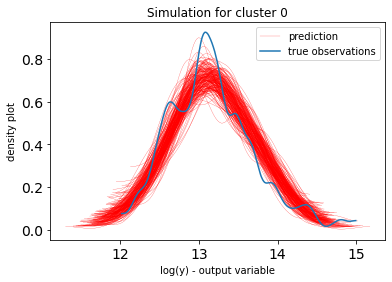

In [65]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 0")
plt.show()

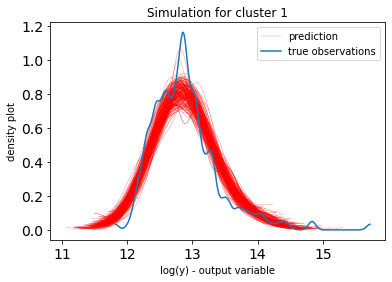

In [66]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 1")
plt.show()

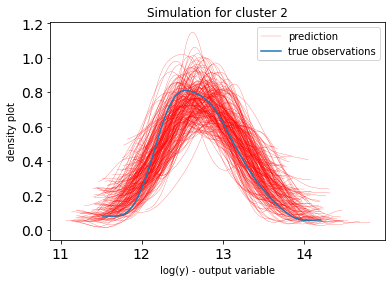

In [67]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 2")
plt.show()

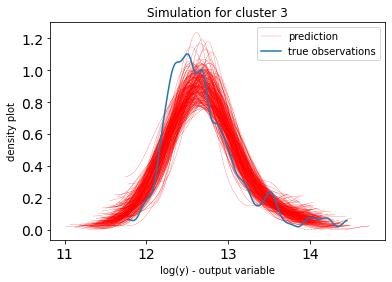

In [68]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 3")
plt.show()

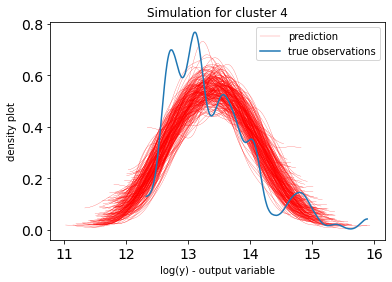

In [69]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 4")
plt.show()

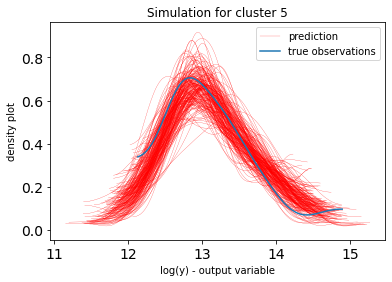

In [70]:
#Simulation
Ypred5 = yscaler5.inverse_transform(ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200))
for i in range(Ypred5.shape[0]):
    az.plot_dist( Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog5,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 5")
plt.show()

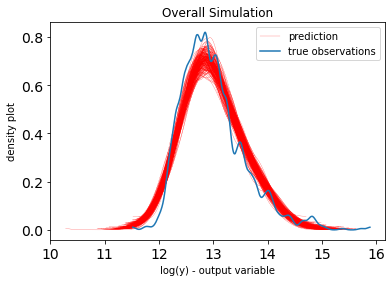

In [71]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 ])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([
                ylog0, 
                ylog1, 
                ylog2, 
                ylog3, 
                ylog4, 
                ylog5,
              ])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Overall Simulation")
plt.show()

In [72]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("------------------------")
print("CLUSTER 0")
print(f"Size: {np.sum(clusters_test==0)}")
print(f"MAE: {np.mean(abs(y_pred_BLR0 - y_val[clusters_test==0]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR0 - y_val[clusters_test==0]) /y_val[clusters_test==0])}")
print("------------------------")

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("------------------------")
print("CLUSTER 1")
print(f"Size: {np.sum(clusters_test==1)}")
print(f"MAE: {np.mean(abs(y_pred_BLR1 - y_val[clusters_test==1]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR1 - y_val[clusters_test==1]) /y_val[clusters_test==1])}")
print("------------------------")

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("------------------------")
print("CLUSTER 2")
print(f"Size: {np.sum(clusters_test==2)}")
print(f"MAE: {np.mean(abs(y_pred_BLR2 - y_val[clusters_test==2]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR2 - y_val[clusters_test==2]) /y_val[clusters_test==2])}")
print("------------------------")

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("------------------------")
print("CLUSTER 3")
print(f"Size: {np.sum(clusters_test==3)}")
print(f"MAE: {np.mean(abs(y_pred_BLR3 - y_val[clusters_test==3]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR3 - y_val[clusters_test==3]) /y_val[clusters_test==3])}")
print("------------------------")

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("------------------------")
print("CLUSTER 4")
print(f"Size: {np.sum(clusters_test==4)}")
print(f"MAE: {np.mean(abs(y_pred_BLR4 - y_val[clusters_test==4]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR4 - y_val[clusters_test==4]) /y_val[clusters_test==4])}")
print("------------------------")

# cluster 5
y_pred_BLR5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5.T)))
print("------------------------")
print("CLUSTER 5")
print(f"Size: {np.sum(clusters_test==5)}")
print(f"MAE: {np.mean(abs(y_pred_BLR5 - y_val[clusters_test==5]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR5 - y_val[clusters_test==5]) /y_val[clusters_test==5])}")
print("------------------------")

# joint MAE
joint_mae=np.hstack([abs(y_pred_BLR0 - y_val[clusters_test==0]),
                 abs(y_pred_BLR1 - y_val[clusters_test==1]),
                 abs(y_pred_BLR2 - y_val[clusters_test==2]),
                 abs(y_pred_BLR3 - y_val[clusters_test==3]),
                 abs(y_pred_BLR4 - y_val[clusters_test==4]),
                 abs(y_pred_BLR5 - y_val[clusters_test==5]),
                 ])

# joint MAPE
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_val[clusters_test==0]) /y_val[clusters_test==0],
                        abs(y_pred_BLR1 - y_val[clusters_test==1]) /y_val[clusters_test==1],
                        abs(y_pred_BLR2 - y_val[clusters_test==2]) /y_val[clusters_test==2],
                        abs(y_pred_BLR3 - y_val[clusters_test==3]) /y_val[clusters_test==3],
                        abs(y_pred_BLR4 - y_val[clusters_test==4]) /y_val[clusters_test==4],
                        abs(y_pred_BLR5 - y_val[clusters_test==5]) /y_val[clusters_test==5],
                       ]))

from sklearn.metrics import mean_squared_error
from math import sqrt

joint_rms = np.mean(np.hstack([
                        sqrt(mean_squared_error(y_val[clusters_test==0], y_pred_BLR0)),
                        sqrt(mean_squared_error(y_val[clusters_test==1], y_pred_BLR1)),
                        sqrt(mean_squared_error(y_val[clusters_test==2], y_pred_BLR2)),
                        sqrt(mean_squared_error(y_val[clusters_test==3], y_pred_BLR3)),
                        sqrt(mean_squared_error(y_val[clusters_test==4], y_pred_BLR4)),
                        sqrt(mean_squared_error(y_val[clusters_test==5], y_pred_BLR5)),
                      ]))

print("------------------------")
print("JOINT PERFORMANCE")
# MAE
print("MAE:", np.mean(joint_mae))
# MAPE
print("MAPE:", joint_mape)
#RMSE
print("RMSE:", joint_rms)
print("------------------------")

------------------------
CLUSTER 0
Size: 73
MAE: 145416.85063016968
MAPE: 0.24439494520721763
------------------------
------------------------
CLUSTER 1
Size: 102
MAE: 114330.23146621117
MAPE: 0.17947463913496145
------------------------
------------------------
CLUSTER 2
Size: 15
MAE: 61991.132074373476
MAPE: 0.19235828182885134
------------------------
------------------------
CLUSTER 3
Size: 49
MAE: 72461.76189335297
MAPE: 0.177247359970807
------------------------
------------------------
CLUSTER 4
Size: 53
MAE: 270144.5152385417
MAPE: 0.27816812938847213
------------------------
------------------------
CLUSTER 5
Size: 33
MAE: 204564.8423875325
MAPE: 0.29425989152523807
------------------------
------------------------
JOINT PERFORMANCE
MAE: 147156.63423346804
MAPE: 0.22206531180251426
RMSE: 267087.2910061679
------------------------


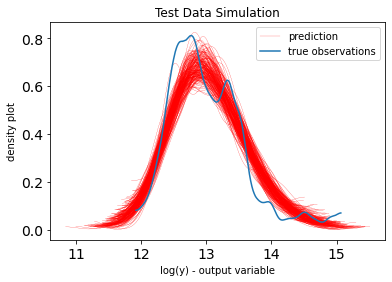

In [73]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xtestn5, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 ])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_val),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Test Data Simulation")
plt.show()

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [74]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])


floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [75]:
# # this can be slow because there are many parameters

# # some parameters
# par1 = 100  # start with 100, then use 1000+
# par2 = 1000 # start with 1000, then use 10000+

# # neural network
# with neural_network:
#     posterior = pm.sample(par1,tune=par2,chains=1)

In [76]:
# we can do instead an approximated inference
param3 = 50000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.001    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,054.3


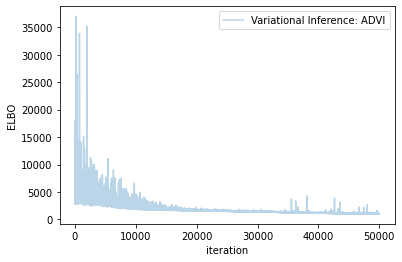

In [77]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [78]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

In [79]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [80]:
# prediction
y_pred_BNN = np.exp(yscaler.inverse_transform(y_pred))
print("MAE = ",(np.mean(abs(y_pred_BNN - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_BNN - y_val) / y_val)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_val, y_pred_BNN))
print("RMSE = ", rms)

MAE =  103136.79445215997
MAPE =  0.17061165955126248
RMSE =  200273.3664203976


# SUMMARY

Your summary here.